# Test Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation
from bayes import BayesianRegression

# UTKFace

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [3]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

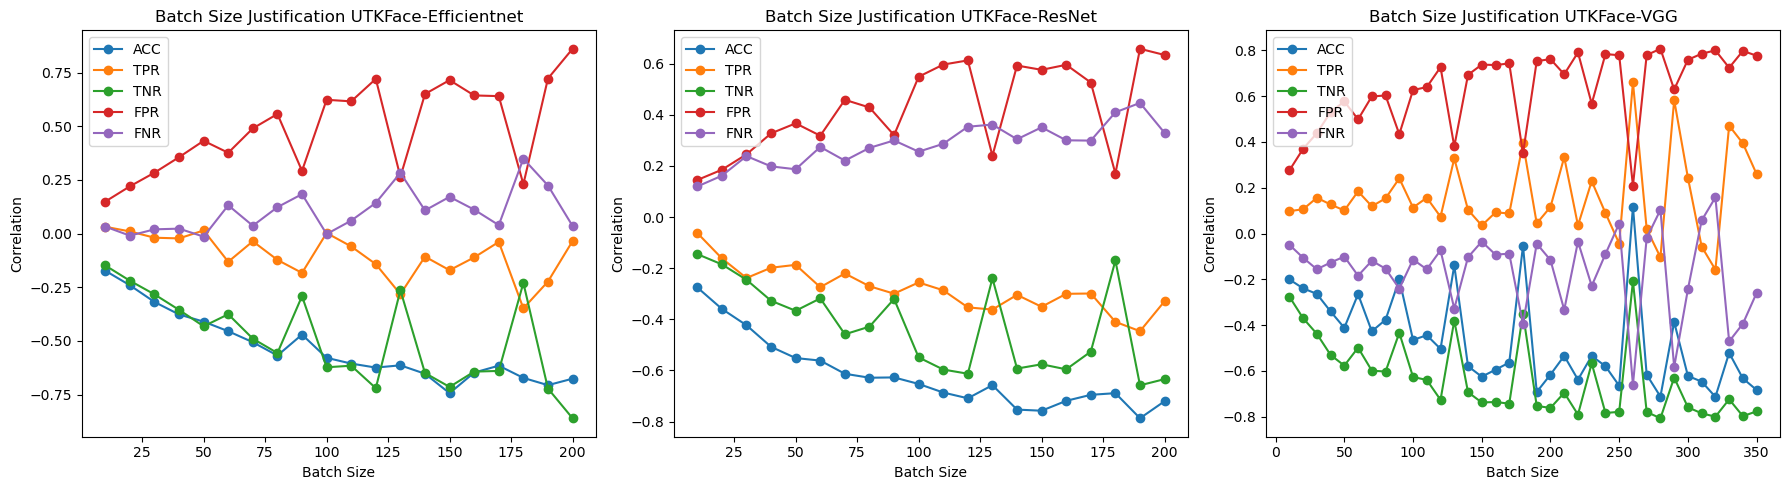

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [5]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=90)
po_resnet.check_optimal_batch_correlation(batch_size=90)
po_vgg.check_optimal_batch_correlation(batch_size=90)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.470734 -0.183457 -0.291813  0.291813  0.183457
ACC      -0.470734  1.000000  0.725544  0.572926 -0.572926 -0.725544
TPR      -0.183457  0.725544  1.000000 -0.088975  0.088975 -1.000000
TNR      -0.291813  0.572926 -0.088975  1.000000 -1.000000  0.088975
FPR       0.291813 -0.572926  0.088975 -1.000000  1.000000 -0.088975
FNR       0.183457 -0.725544 -1.000000  0.088975 -0.088975  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.627394 -0.299766 -0.320422  0.320422  0.299766
ACC      -0.627394  1.000000  0.798712  0.379858 -0.379858 -0.798712
TPR      -0.299766  0.798712  1.000000 -0.160923  0.160923 -1.000000
TNR      -0.320422  0.379858 -0.160923  1.000000 -1.000000  0.160923
FPR       0.320422 -0.379858  0.160923 -1.000000  1.000000 -0.160923
FNR       0.299766 -0.798712 -1.000000  0.160923 -0.160923  1.000000
          distance       ACC      

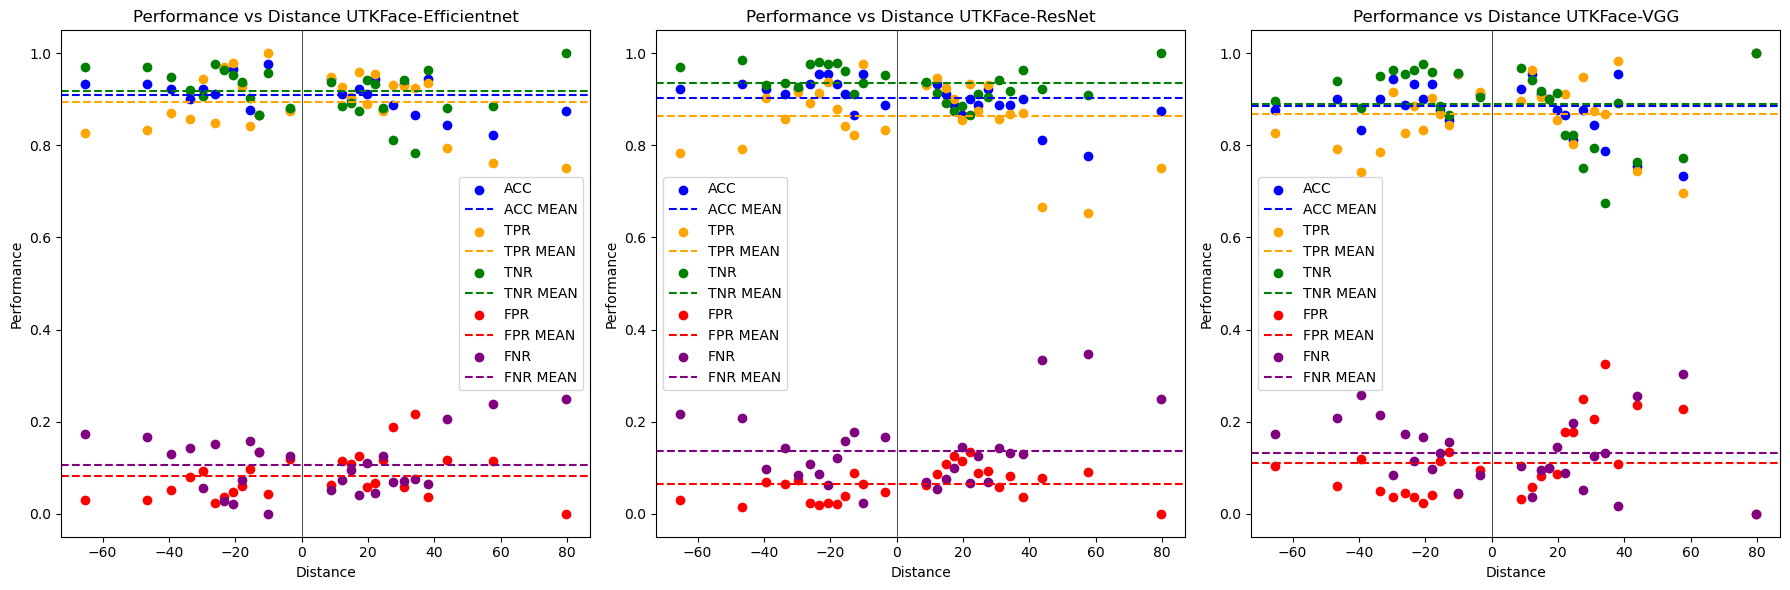

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# CelebA

In [7]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [8]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

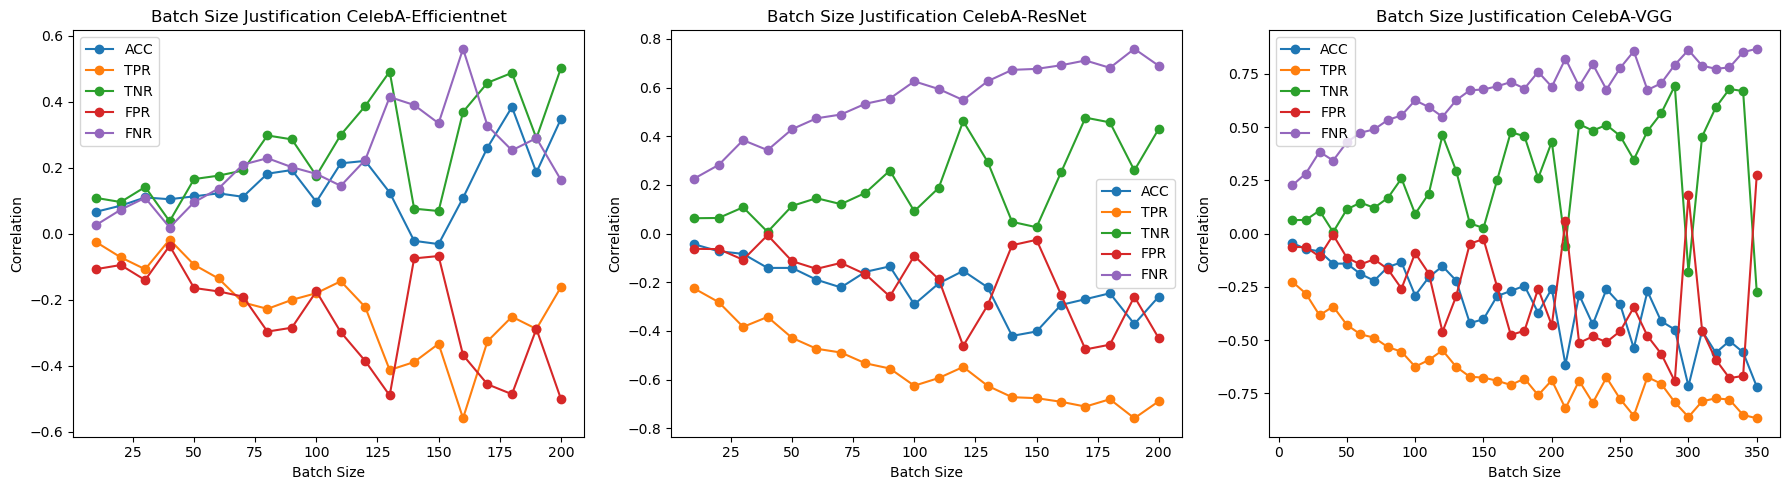

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [10]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=60)
po_resnet.check_optimal_batch_correlation(batch_size=60)
po_vgg.check_optimal_batch_correlation(batch_size=60)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.121696 -0.136270  0.175403 -0.175403  0.136270
ACC       0.121696  1.000000  0.778950  0.565363 -0.565363 -0.778950
TPR      -0.136270  0.778950  1.000000 -0.035808  0.035808 -1.000000
TNR       0.175403  0.565363 -0.035808  1.000000 -1.000000  0.035808
FPR      -0.175403 -0.565363  0.035808 -1.000000  1.000000 -0.035808
FNR       0.136270 -0.778950 -1.000000  0.035808 -0.035808  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.189924 -0.473442  0.145188 -0.145188  0.473442
ACC      -0.189924  1.000000  0.822625  0.336952 -0.336952 -0.822625
TPR      -0.473442  0.822625  1.000000 -0.188489  0.188489 -1.000000
TNR       0.145188  0.336952 -0.188489  1.000000 -1.000000  0.188489
FPR      -0.145188 -0.336952  0.188489 -1.000000  1.000000 -0.188489
FNR       0.473442 -0.822625 -1.000000  0.188489 -0.188489  1.000000
          distance       ACC      

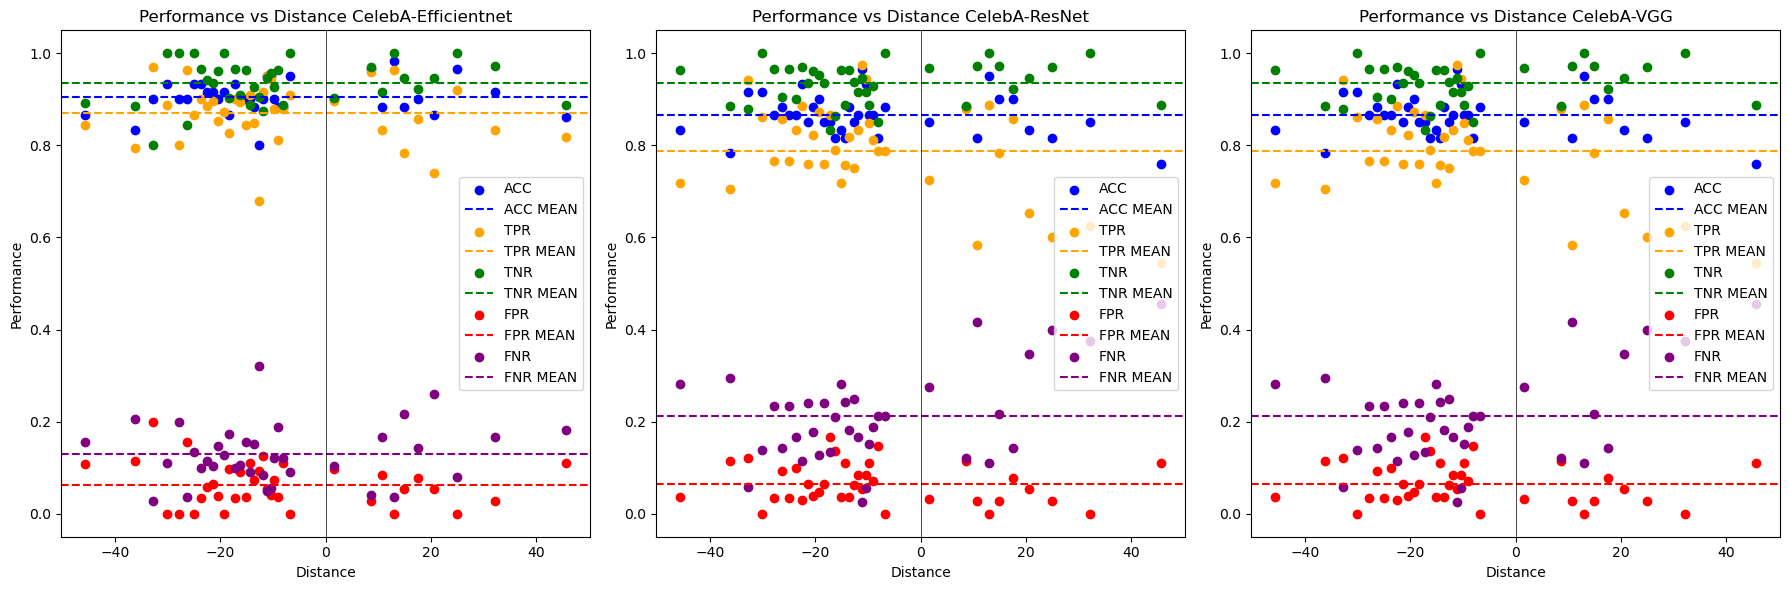

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# HAM10000

In [12]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [13]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

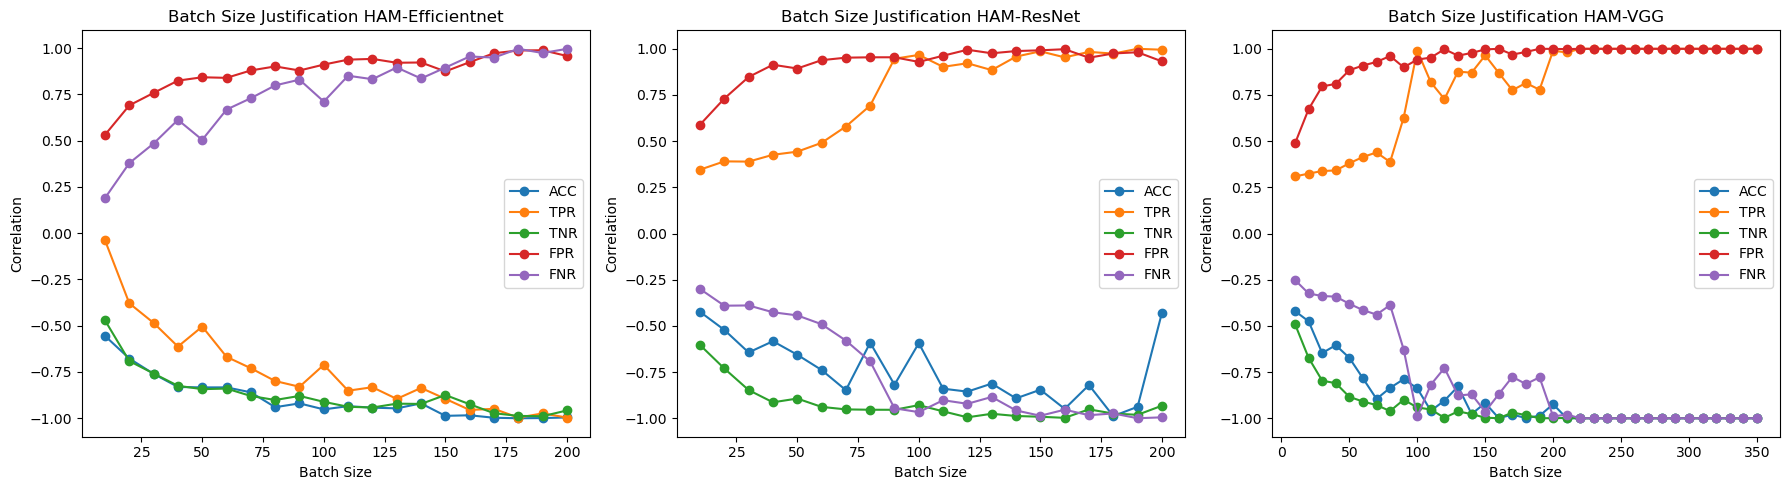

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [15]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=30)
po_resnet.check_optimal_batch_correlation(batch_size=30)
po_vgg.check_optimal_batch_correlation(batch_size=30)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.760089 -0.484800 -0.758186  0.758186  0.484800
ACC      -0.760089  1.000000  0.837495  0.924173 -0.924173 -0.837495
TPR      -0.484800  0.837495  1.000000  0.623900 -0.623900 -1.000000
TNR      -0.758186  0.924173  0.623900  1.000000 -1.000000 -0.623900
FPR       0.758186 -0.924173 -0.623900 -1.000000  1.000000  0.623900
FNR       0.484800 -0.837495 -1.000000 -0.623900  0.623900  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.643758  0.389321 -0.847333  0.847333 -0.389321
ACC      -0.643758  1.000000 -0.177715  0.744204 -0.744204  0.177715
TPR       0.389321 -0.177715  1.000000 -0.500600  0.500600 -1.000000
TNR      -0.847333  0.744204 -0.500600  1.000000 -1.000000  0.500600
FPR       0.847333 -0.744204  0.500600 -1.000000  1.000000 -0.500600
FNR      -0.389321  0.177715 -1.000000  0.500600 -0.500600  1.000000
          distance       ACC      

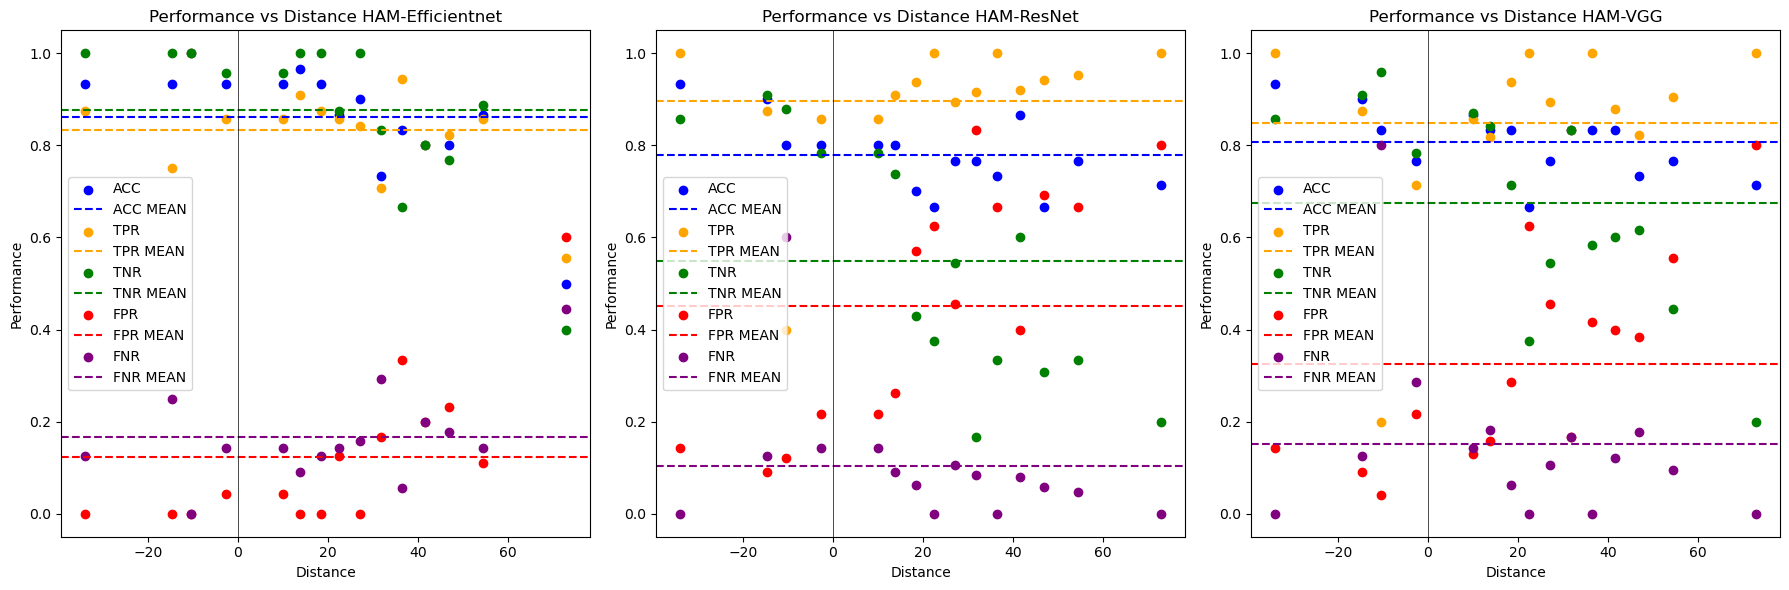

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()